<a href="https://colab.research.google.com/github/umurerwa-jacky/Homework1-AI_DS/blob/main/homework12.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# A.PREPROCESSING

### 1. Load the training datasets.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib .pyplot as plt

In [ ]:
df = pd.read_csv("train.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


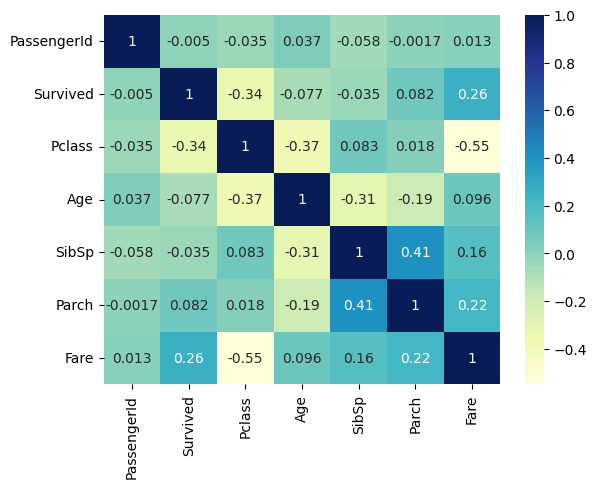

In [ ]:
# Select only numerical columns for correlation matrix
numerical_features = ['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']

# Calculate the correlation matrix
corr_matrix = df[numerical_features].corr()

# Plot the heatmap
sns.heatmap(corr_matrix, cmap="YlGnBu", annot=True)
plt.show()

In [ ]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


### 2. Handle missing values (e.g., impute using mean/median or drop rows with missing values).

In [ ]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [ ]:
print (f"the size of a dataset before dripping a feature : {df.shape}")

the size of a dataset before dripping a feature : (891, 12)


In [ ]:
### drop a column with more missing values
df.drop(["Cabin"],axis=1 , inplace=True)
print(f" the size of a dataset after dropping a feature: {df.shape}")

 the size of a dataset after dropping a feature: (891, 11)


In [ ]:
# values imputatation
from sklearn .impute import SimpleImputer
imp = SimpleImputer(strategy="mean")
df["Age"] = imp.fit_transform(df[['Age']])
print (f"number of null values in age column after imputation :{df.Age.isnull().sum()}")

number of null values in age column after imputation :0


In [ ]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       2
dtype: int64

In [ ]:
df.info

<bound method DataFrame.info of      PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex        Age  \
0                              Braund, Mr. Owen Harris    male  22.000000   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.000000   
2                               Heikkinen, Miss. Laina  female  26.000000   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.000000   
4                             Allen, Mr. William Henry    male  35.000000   
..                                               

In [ ]:
import pandas as pd
from sklearn.impute import SimpleImputer
# Impute missing values in 'Embarked' column with the most frequent value
imp = SimpleImputer(strategy="most_frequent")
df["Embarked"] = imp.fit_transform(df[['Embarked']]).ravel()
# Display DataFrame after imputation
print("\nDataFrame after imputation:")
print(df)
# Print the number of null values in 'Embarked' column after imputation
print(f"\nNumber of null values in 'Embarked' column after imputation: {df.Embarked.isnull().sum()}")



DataFrame after imputation:
     PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex        Age  \
0                              Braund, Mr. Owen Harris    male  22.000000   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.000000   
2                               Heikkinen, Miss. Laina  female  26.000000   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.000000   
4                             Allen, Mr. William Henry    male  35.000000   
..                                                 .

In [ ]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.000000,0,0,211536,13.0000,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.000000,0,0,112053,30.0000,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.699118,1,2,W./C. 6607,23.4500,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.000000,0,0,111369,30.0000,C


In [ ]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

### 3. Encode categorical features (e.g., one-hot encoding for Sex, Embarked).

In [ ]:
df_encoded = pd.get_dummies(df, columns=['Sex', 'Embarked'])

# Display the first few rows of the encoded DataFrame
df_encoded.head()
df_encoded = pd.get_dummies(df, columns=['Sex', 'Embarked'], drop_first=True) # this is helpfull in improving performance ,reducing redundance
df_encoded.head()

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Sex_male,Embarked_Q,Embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,True,False,True
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,False,False,False
2,3,1,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,False,False,True
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,False,False,True
4,5,0,3,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,True,False,True


In [ ]:
# One-hot encode the 'Sex' and 'Embarked' columns
df_encoded = pd.get_dummies(df, columns=['Sex', 'Embarked'], drop_first=True)

# Convert boolean columns to integers
df_encoded['Sex_male'] = df_encoded['Sex_male'].astype(int)
df_encoded['Embarked_Q'] = df_encoded['Embarked_Q'].astype(int)
df_encoded['Embarked_S'] = df_encoded['Embarked_S'].astype(int)

# Display the first few rows of the encoded DataFrame
df_encoded.head()

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Sex_male,Embarked_Q,Embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,1,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,0,0,0
2,3,1,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,0,0,1
4,5,0,3,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,1,0,1


## 4.Consider feature scaling (e.g., standardization) for numerical features used in specific models (e.g., SVM, Linear Regression).

In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Select the numerical features for scaling
numerical_features = ['PassengerId', 'Age', 'SibSp', 'Parch', 'Fare']

# Instantiate the scaler
scaler = StandardScaler()

# Fit the scaler to the numerical features and transform them
df[numerical_features] = scaler.fit_transform(df[numerical_features])

# Display the first few rows of the transformed DataFrame
df.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,-1.730108,0,3,"Braund, Mr. Owen Harris",male,-0.592481,0.432793,-0.473674,A/5 21171,-0.502445,S
1,-1.726220,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,0.638789,0.432793,-0.473674,PC 17599,0.786845,C
2,-1.722332,1,3,"Heikkinen, Miss. Laina",female,-0.284663,-0.474545,-0.473674,STON/O2. 3101282,-0.488854,S
3,-1.718444,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,0.407926,0.432793,-0.473674,113803,0.420730,S
4,-1.714556,0,3,"Allen, Mr. William Henry",male,0.407926,-0.474545,-0.473674,373450,-0.486337,S


## 5.	Apply PCA (optional) to reduce dimensionality, potentially improving model performance.

In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
# Select the numerical features for scaling and PCA
numerical_features = ['PassengerId', 'Age', 'SibSp', 'Parch', 'Fare']

# Standardize the numerical features
scaler = StandardScaler()
df[numerical_features] = scaler.fit_transform(df[numerical_features])

# Apply PCA
pca = PCA(n_components=2)  # Specify the number of components you want to keep
principal_components = pca.fit_transform(df[numerical_features])

# Create a new DataFrame with the principal components
pca_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])

# Concatenate the PCA DataFrame with the original DataFrame (excluding the original numerical features)
df_pca = pd.concat([df.drop(numerical_features, axis=1), pca_df], axis=1)

# Display the first few rows of the transformed DataFrame
df_pca.head()


,Survived,Pclass,Name,Sex,Ticket,Embarked,PC1,PC2
0,0,3,"Braund, Mr. Owen Harris",male,A/5 21171,S,0.155841,-1.335215
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,PC 17599,C,0.115179,0.347368
2,1,3,"Heikkinen, Miss. Laina",female,STON/O2. 3101282,S,-0.515629,-1.072859
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,113803,S,0.083215,-0.052613
4,0,3,"Allen, Mr. William Henry",male,373450,S,-0.765440,-0.630808


In [ ]:
train_data_imputed = df
train_data_imputed

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,-1.730108,0,3,"Braund, Mr. Owen Harris",male,-5.924806e-01,0.432793,-0.473674,A/5 21171,-0.502445,S
1,-1.726220,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,6.387890e-01,0.432793,-0.473674,PC 17599,0.786845,C
2,-1.722332,1,3,"Heikkinen, Miss. Laina",female,-2.846632e-01,-0.474545,-0.473674,STON/O2. 3101282,-0.488854,S
3,-1.718444,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,4.079260e-01,0.432793,-0.473674,113803,0.420730,S
4,-1.714556,0,3,"Allen, Mr. William Henry",male,4.079260e-01,-0.474545,-0.473674,373450,-0.486337,S
...,...,...,...,...,...,...,...,...,...,...,...
886,1.714556,0,2,"Montvila, Rev. Juozas",male,-2.077088e-01,-0.474545,-0.473674,211536,-0.386671,S
887,1.718444,1,1,"Graham, Miss. Margaret Edith",female,-8.233437e-01,-0.474545,-0.473674,112053,-0.044381,S
888,1.722332,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,-2.232906e-16,0.432793,2.008933,W./C. 6607,-0.176263,S
889,1.726220,1,1,"Behr, Mr. Karl Howell",male,-2.846632e-01,-0.474545,-0.473674,111369,-0.044381,C


# B. BUILDING

#### 1.	Train each of the chosen models (Naive Bayes, Linear Regression with logistic regression for classification, SVM, Random Forests) on the training data.

##### i. First showing that my training data has no missing values

In [ ]:

train_data_imputed.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

##### ii. importing the testing data

In [ ]:
test_data=pd.read_csv("test.csv")
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


##### iii. handling missing value in testing dataset

In [ ]:
# check if there are some missing values
test_data.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [ ]:
# size of dataset before dropping a feature
test_data.shape

(418, 11)

In [ ]:
# Drop a column with more missing values
test_data.drop(["Cabin"],axis=1 , inplace=True)
print(f" the size of a dataset after dropping a feature: {test_data.shape}")

 the size of a dataset after dropping a feature: (418, 10)


In [ ]:
# imputing missing values in Age feature
from sklearn .impute import SimpleImputer
imp = SimpleImputer(strategy="mean")
test_data["Age"] = imp.fit_transform(test_data[['Age']])
print (f"number of null values in Age column after imputation :{test_data.Age.isnull().sum()}")

number of null values in Age column after imputation :0


In [ ]:
# imputing missing values in Fare feature
imp = SimpleImputer(strategy="mean")
test_data["Fare"] = imp.fit_transform(test_data[['Fare']])
print (f"number of null values in Fare column after imputation :{test_data.Fare.isnull().sum()}")

number of null values in Fare column after imputation :0


In [ ]:
test_data_imputed = test_data
test_data_imputed . head(3)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,Q


In [ ]:
test_data_imputed .isnull().sum().sum()

0

#### Train each of the chosen models (Naive Bayes, Linear Regression with logistic regression for classification, SVM, Random Forests) on the training data.¶

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Assuming 'train_data_imputed' is your DataFrame
# Replace 'your_file.csv' with the actual path to your dataset if loading from a CSV
# train_data_imputed = pd.read_csv('your_file.csv')

# Encode categorical variables
X = pd.get_dummies(train_data_imputed[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']], columns=['Sex', 'Embarked'])
y = train_data_imputed['Survived']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature scaling if required (for SVM, not always necessary for other models)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize models
nb_model = GaussianNB()
logreg_model = LogisticRegression()
svm_model = SVC(kernel='linear')
rf_model = RandomForestClassifier()

# Train Naive Bayes
nb_model.fit(X_train, y_train)
nb_preds = nb_model.predict(X_test)
nb_accuracy = accuracy_score(y_test, nb_preds)
print(f'Naive Bayes Accuracy: {nb_accuracy:.2f}')

# Train Logistic Regression
logreg_model.fit(X_train, y_train)
logreg_preds = logreg_model.predict(X_test)
logreg_accuracy = accuracy_score(y_test, logreg_preds)
print(f'Logistic Regression Accuracy: {logreg_accuracy:.2f}')

# Train SVM
svm_model.fit(X_train_scaled, y_train)
svm_preds = svm_model.predict(X_test_scaled)
svm_accuracy = accuracy_score(y_test, svm_preds)
print(f'SVM Accuracy: {svm_accuracy:.2f}')

# Train Random Forest
rf_model.fit(X_train, y_train)
rf_preds = rf_model.predict(X_test)
rf_accuracy = accuracy_score(y_test, rf_preds)
print(f'Random Forest Accuracy: {rf_accuracy:.2f}')


Naive Bayes Accuracy: 0.78
Logistic Regression Accuracy: 0.81
SVM Accuracy: 0.78
Random Forest Accuracy: 0.82


#### 2. Tune hyperparameters (if applicable) for each model to optimize performance.

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Assuming 'train_data_imputed' is your DataFrame
# Replace 'your_file.csv' with the actual path to your dataset if loading from a CSV
# train_data_imputed = pd.read_csv('your_file.csv')

# Encode categorical variables
X = pd.get_dummies(train_data_imputed[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']], columns=['Sex', 'Embarked'])
y = train_data_imputed['Survived']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature scaling if required (for SVM, not always necessary for other models)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize models
nb_model = GaussianNB()
logreg_model = LogisticRegression(solver='lbfgs')  # Ensure lbfgs solver is used
svm_model = SVC()
rf_model = RandomForestClassifier()

# Perform Grid Search for each model

# Naive Bayes (No hyperparameters to tune directly, using cross-validation for evaluation)
nb_accuracy = cross_val_score(nb_model, X, y, cv=5, scoring='accuracy')
print(f'Naive Bayes Cross-Validation Accuracy: {nb_accuracy.mean():.2f}')

# Logistic Regression
logreg_param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'penalty': ['l2']  # Only include 'l2' penalty, as 'lbfgs' solver does not support 'l1'
}
logreg_grid_search = GridSearchCV(estimator=logreg_model, param_grid=logreg_param_grid, cv=5, scoring='accuracy')
logreg_grid_search.fit(X_train, y_train)
print("Best Parameters for Logistic Regression:", logreg_grid_search.best_params_)
print("Best Cross-Validation Accuracy for Logistic Regression:", logreg_grid_search.best_score_)

# SVM
svm_param_grid = {
    'kernel': ['linear', 'rbf'],
    'C': [0.1, 1, 10],
    'gamma': ['scale', 'auto']
}
svm_grid_search = GridSearchCV(estimator=svm_model, param_grid=svm_param_grid, cv=5, scoring='accuracy')
svm_grid_search.fit(X_train_scaled, y_train)
print("Best Parameters for SVM:", svm_grid_search.best_params_)
print("Best Cross-Validation Accuracy for SVM:", svm_grid_search.best_score_)

# Random Forest
rf_param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30]
}
rf_grid_search = GridSearchCV(estimator=rf_model, param_grid=rf_param_grid, cv=5, scoring='accuracy')
rf_grid_search.fit(X_train, y_train)
print("Best Parameters for Random Forest:", rf_grid_search.best_params_)
print("Best Cross-Validation Accuracy for Random Forest:", rf_grid_search.best_score_)


Naive Bayes Cross-Validation Accuracy: 0.79
Best Parameters for Logistic Regression: {'C': 0.1, 'penalty': 'l2'}
Best Cross-Validation Accuracy for Logistic Regression: 0.7934896089825667
Best Parameters for SVM: {'C': 10, 'gamma': 'scale', 'kernel': 'rbf'}
Best Cross-Validation Accuracy for SVM: 0.8286516300600809
Best Parameters for Random Forest: {'max_depth': 10, 'n_estimators': 300}
Best Cross-Validation Accuracy for Random Forest: 0.8174037230375258


#### 3.	Limit input to certain features (feature selection) or create new features (feature engineering) on look at the impact on model performance.

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Assuming 'train_data_imputed' is your DataFrame
# Replace 'your_file.csv' with the actual path to your dataset if loading from a CSV
# train_data_imputed = pd.read_csv('your_file.csv')

# Feature engineering: Create a new feature 'FamilySize'
train_data_imputed['FamilySize'] = train_data_imputed['SibSp'] + train_data_imputed['Parch'] + 1  # plus one for the person themselves

# Perform feature selection (selecting relevant features based on domain knowledge or importance)
selected_features = ['Pclass', 'Sex', 'Age', 'Fare', 'FamilySize']

# Encode categorical variables and select only the chosen features
X = pd.get_dummies(train_data_imputed[selected_features], columns=['Sex'])
y = train_data_imputed['Survived']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature scaling if required (for SVM, not always necessary for other models)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize models
nb_model = GaussianNB()
logreg_model = LogisticRegression(solver='lbfgs')  # Ensure lbfgs solver is used
svm_model = SVC()
rf_model = RandomForestClassifier()

# Perform Grid Search for each model

# Naive Bayes (No hyperparameters to tune directly, using cross-validation for evaluation)
nb_accuracy = cross_val_score(nb_model, X, y, cv=5, scoring='accuracy')
print(f'Naive Bayes Cross-Validation Accuracy with selected features: {nb_accuracy.mean():.2f}')

# Logistic Regression
logreg_param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'penalty': ['l2']  # Only include 'l2' penalty, as 'lbfgs' solver does not support 'l1'
}
logreg_grid_search = GridSearchCV(estimator=logreg_model, param_grid=logreg_param_grid, cv=5, scoring='accuracy')
logreg_grid_search.fit(X_train, y_train)
print("Best Parameters for Logistic Regression:", logreg_grid_search.best_params_)
print("Best Cross-Validation Accuracy for Logistic Regression with selected features:", logreg_grid_search.best_score_)

# SVM
svm_param_grid = {
    'kernel': ['linear', 'rbf'],
    'C': [0.1, 1, 10],
    'gamma': ['scale', 'auto']
}
svm_grid_search = GridSearchCV(estimator=svm_model, param_grid=svm_param_grid, cv=5, scoring='accuracy')
svm_grid_search.fit(X_train_scaled, y_train)
print("Best Parameters for SVM:", svm_grid_search.best_params_)
print("Best Cross-Validation Accuracy for SVM with selected features:", svm_grid_search.best_score_)

# Random Forest
rf_param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30]
}
rf_grid_search = GridSearchCV(estimator=rf_model, param_grid=rf_param_grid, cv=5, scoring='accuracy')
rf_grid_search.fit(X_train, y_train)
print("Best Parameters for Random Forest:", rf_grid_search.best_params_)
print("Best Cross-Validation Accuracy for Random Forest with selected features:", rf_grid_search.best_score_)


Naive Bayes Cross-Validation Accuracy with selected features: 0.79
Best Parameters for Logistic Regression: {'C': 0.1, 'penalty': 'l2'}
Best Cross-Validation Accuracy for Logistic Regression with selected features: 0.8032896680784004
Best Parameters for SVM: {'C': 1, 'gamma': 'auto', 'kernel': 'rbf'}
Best Cross-Validation Accuracy for SVM with selected features: 0.8257854821235103
Best Parameters for Random Forest: {'max_depth': 10, 'n_estimators': 100}
Best Cross-Validation Accuracy for Random Forest with selected features: 0.8286023835319609


# C.Evaluation

In [ ]:
test_data_imputed.head(3)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,Q


In [ ]:
test_data_imputed.isnull().sum().sum()

0

### 1. Evaluate each model's performance on the unseen test data using metrics like accuracy, precision, recall, and F1-score.

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
import joblib

# Load datasets
# Replace 'your_train_file.csv' and 'your_test_file.csv' with the actual paths to your datasets
# train_data_imputed = pd.read_csv('your_train_file.csv')
# test_data_imputed = pd.read_csv('your_test_file.csv')

# Feature engineering: Create a new feature 'FamilySize'
train_data_imputed['FamilySize'] = train_data_imputed['SibSp'] + train_data_imputed['Parch'] + 1
test_data_imputed['FamilySize'] = test_data_imputed['SibSp'] + test_data_imputed['Parch'] + 1

# Select relevant features and encode categorical variables
selected_features = ['Pclass', 'Sex', 'Age', 'Fare', 'FamilySize']
X = pd.get_dummies(train_data_imputed[selected_features], columns=['Sex'])
y = train_data_imputed['Survived']
X_test = pd.get_dummies(test_data_imputed[selected_features], columns=['Sex'])

# Ensure that X_test has the same dummy variables as X
for col in X.columns:
    if col not in X_test.columns:
        X_test[col] = 0

# Split data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

# Initialize models
nb_model = GaussianNB()
logreg_model = LogisticRegression(max_iter=200)
svm_model = SVC()
rf_model = RandomForestClassifier()

# Define hyperparameter grids for tuning
param_grid_nb = {}
param_grid_logreg = {
    'solver': ['liblinear', 'saga'],
    'C': [0.1, 1, 10]
}
param_grid_svm = {
    'kernel': ['linear', 'rbf'],
    'C': [0.1, 1, 10]
}
param_grid_rf = {
    'n_estimators': [100, 200],
    'max_features': ['sqrt', 'log2']
}

# Perform grid search for each model
grid_nb = GridSearchCV(nb_model, param_grid_nb, cv=5, scoring='accuracy')
grid_logreg = GridSearchCV(logreg_model, param_grid_logreg, cv=5, scoring='accuracy')
grid_svm = GridSearchCV(svm_model, param_grid_svm, cv=5, scoring='accuracy')
grid_rf = GridSearchCV(rf_model, param_grid_rf, cv=5, scoring='accuracy')

# Train and save models
grid_nb.fit(X_train, y_train)
joblib.dump(grid_nb.best_estimator_, 'nb_model.pkl')

grid_logreg.fit(X_train, y_train)
joblib.dump(grid_logreg.best_estimator_, 'logreg_model.pkl')

grid_svm.fit(X_train_scaled, y_train)
joblib.dump(grid_svm.best_estimator_, 'svm_model.pkl')

grid_rf.fit(X_train, y_train)
joblib.dump(grid_rf.best_estimator_, 'rf_model.pkl')

# Load trained models
nb_model = joblib.load('nb_model.pkl')
logreg_model = joblib.load('logreg_model.pkl')
svm_model = joblib.load('svm_model.pkl')
rf_model = joblib.load('rf_model.pkl')

# Predict using models on the test data
models = {
    'Naive Bayes': nb_model,
    'Logistic Regression': logreg_model,
    'SVM': svm_model,
    'Random Forest': rf_model
}

predictions = {}

for name, model in models.items():
    if name == 'Naive Bayes':
        predictions[name] = model.predict(X_test)
    elif name == 'SVM':
        predictions[name] = model.predict(X_test_scaled)
    else:
        predictions[name] = model.predict(X_test)

# Print predictions to the screen
for name, preds in predictions.items():
    print(f"\n{name} Predictions:")
    print(pd.DataFrame({'PassengerId': test_data_imputed['PassengerId'], 'Survived': preds}))

print("Predictions have been displayed on screen.")


C:\Users\HP\AppData\Roaming\Python\Python312\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\HP\AppData\Roaming\Python\Python312\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\HP\AppData\Roaming\Python\Python312\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\HP\AppData\Roaming\Python\Python312\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\HP\AppData\Roaming\Python\Python312\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\HP\AppData\Roaming\Py


Naive Bayes Predictions:
     PassengerId  Survived
0            892         1
1            893         1
2            894         1
3            895         1
4            896         1
..           ...       ...
413         1305         1
414         1306         1
415         1307         1
416         1308         1
417         1309         1

[418 rows x 2 columns]

Logistic Regression Predictions:
     PassengerId  Survived
0            892         0
1            893         0
2            894         0
3            895         0
4            896         0
..           ...       ...
413         1305         0
414         1306         1
415         1307         0
416         1308         0
417         1309         0

[418 rows x 2 columns]

SVM Predictions:
     PassengerId  Survived
0            892         0
1            893         0
2            894         0
3            895         0
4            896         0
..           ...       ...
413         1305         0
414       

### 2. You can utilize libraries like scikit-learn in Python for model training, evaluation, and hyperparameter tuning.